In [33]:
import numpy as np 
import pandas as pd 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
%matplotlib notebook
import time

import warnings
warnings.filterwarnings("ignore")

# **Data Cleaning**

In [7]:
#list of data that we have in the workspace

print(os.listdir("../input/youtube-new"))

['INvideos.csv', 'CAvideos.csv', 'DE_category_id.json', 'MXvideos.csv', 'KRvideos.csv', 'FRvideos.csv', 'CA_category_id.json', 'JP_category_id.json', 'KR_category_id.json', 'DEvideos.csv', 'RU_category_id.json', 'US_category_id.json', 'GBvideos.csv', 'FR_category_id.json', 'RUvideos.csv', 'USvideos.csv', 'GB_category_id.json', 'MX_category_id.json', 'IN_category_id.json', 'JPvideos.csv']


In [8]:
# countries that use English as an official language
british_youtube = pd.read_csv("../input/youtube-new/GBvideos.csv")
canadian_youtube = pd.read_csv("../input/youtube-new/CAvideos.csv")
us_youtube = pd.read_csv("../input/youtube-new/USvideos.csv")


First of all, let's take a look at data :)

In [12]:
british_youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [10]:
canadian_youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [11]:
us_youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [13]:
#combine tables
three_countries=pd.concat([canadian_youtube, british_youtube,us_youtube])
three_countries.shape

(120746, 16)

In [14]:
#Check duplicate. It is always good to check whether there are some duplicates in dataset!
three_countries.video_id.value_counts()[:10]

8h--kFui1JA    70
VYOjWnS4cMY    69
vjSohj-Iclc    65
l884wKofd54    64
UUkn-enk2RU    64
zxwfDlhJIpw    64
5GHXEGz3PJg    63
CX11yw6YL1w    63
i5qOzqD9Rms    61
pFc6I0rgmgY    61
Name: video_id, dtype: int64

In [15]:
#remove duplicate
three_countries= three_countries.drop_duplicates(['video_id'], keep='first')

In [16]:
three_countries.video_id.value_counts()[:10]

6OqZ6XCEhxY    1
tJfDBSWYqU8    1
O3ckwTg4yJ4    1
lmzfBVsII60    1
CQXPKL7lCHA    1
EFNeulNdfRI    1
HluANRwPyNo    1
OKgUiBOpsZ4    1
oJ_g5fUxtQo    1
V7cn0qv-LNw    1
Name: video_id, dtype: int64

In [17]:
#need to be decoded 
three_countries.category_id.head()

0    10
1    23
2    23
3    24
4    10
Name: category_id, dtype: int64

In [20]:
import json

def category_name(path):
    with open(path) as json_file:  
        data = json.load(json_file)
    category_info_list=[]
    for row in data['items']:
        id_info=row['id']
        category_name=row['snippet']['title']
        categoty_info=(id_info ,category_name)
        category_info_list.append(categoty_info)
    return(dict(category_info_list))

category_name("../input/youtube-new/CA_category_id.json")

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [23]:
category_list=category_name("../input/youtube-new/CA_category_id.json")
category_names=[]
for i in three_countries.category_id:
    category_name=category_list.get(str(i))
    category_names.append(category_name)

three_countries['category_names']=category_names

In [24]:
#now, we have category name :)
three_countries['category_names'].head()

0            Music
1           Comedy
2           Comedy
3    Entertainment
4            Music
Name: category_names, dtype: object

In [25]:
three_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30318 entries, 0 to 40766
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                30318 non-null  object
 1   trending_date           30318 non-null  object
 2   title                   30318 non-null  object
 3   channel_title           30318 non-null  object
 4   category_id             30318 non-null  int64 
 5   publish_time            30318 non-null  object
 6   tags                    30318 non-null  object
 7   views                   30318 non-null  int64 
 8   likes                   30318 non-null  int64 
 9   dislikes                30318 non-null  int64 
 10  comment_count           30318 non-null  int64 
 11  thumbnail_link          30318 non-null  object
 12  comments_disabled       30318 non-null  bool  
 13  ratings_disabled        30318 non-null  bool  
 14  video_error_or_removed  30318 non-null  bool  
 15  de

# **Finding Outlier Youtube Video**

The dataset already includes trending Youtube video. However, I am interested in taking a look at popular ones among trending videos. I will use number of view as the variable to define the popularity of video. In the analysis, a popular video means the number of view for the video is more than 1.5 interquartile ranges (IQRs) above the third quartile. 

In [28]:
Q1 = three_countries.views.quantile(0.25)
Q3 = three_countries.views.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popular_videos=three_countries.loc[three_countries.views > (Q3 + 1.5 * IQR)]

three_countries['popular']=0
three_countries.loc[three_countries.views > (Q3 + 1.5 * IQR),'popular']=1

three_countries['popular'].value_counts()

387148.5


0    27452
1     2866
Name: popular, dtype: int64

In [29]:
#make a variable that tells ratio of like and dislike
three_countries['like_percentage']=(three_countries['likes']/(three_countries['likes']+three_countries['dislikes'])*100)
#date column as datatime datatype
three_countries["publish_time"] = pd.to_datetime(three_countries["publish_time"])

<IPython.core.display.Javascript object>


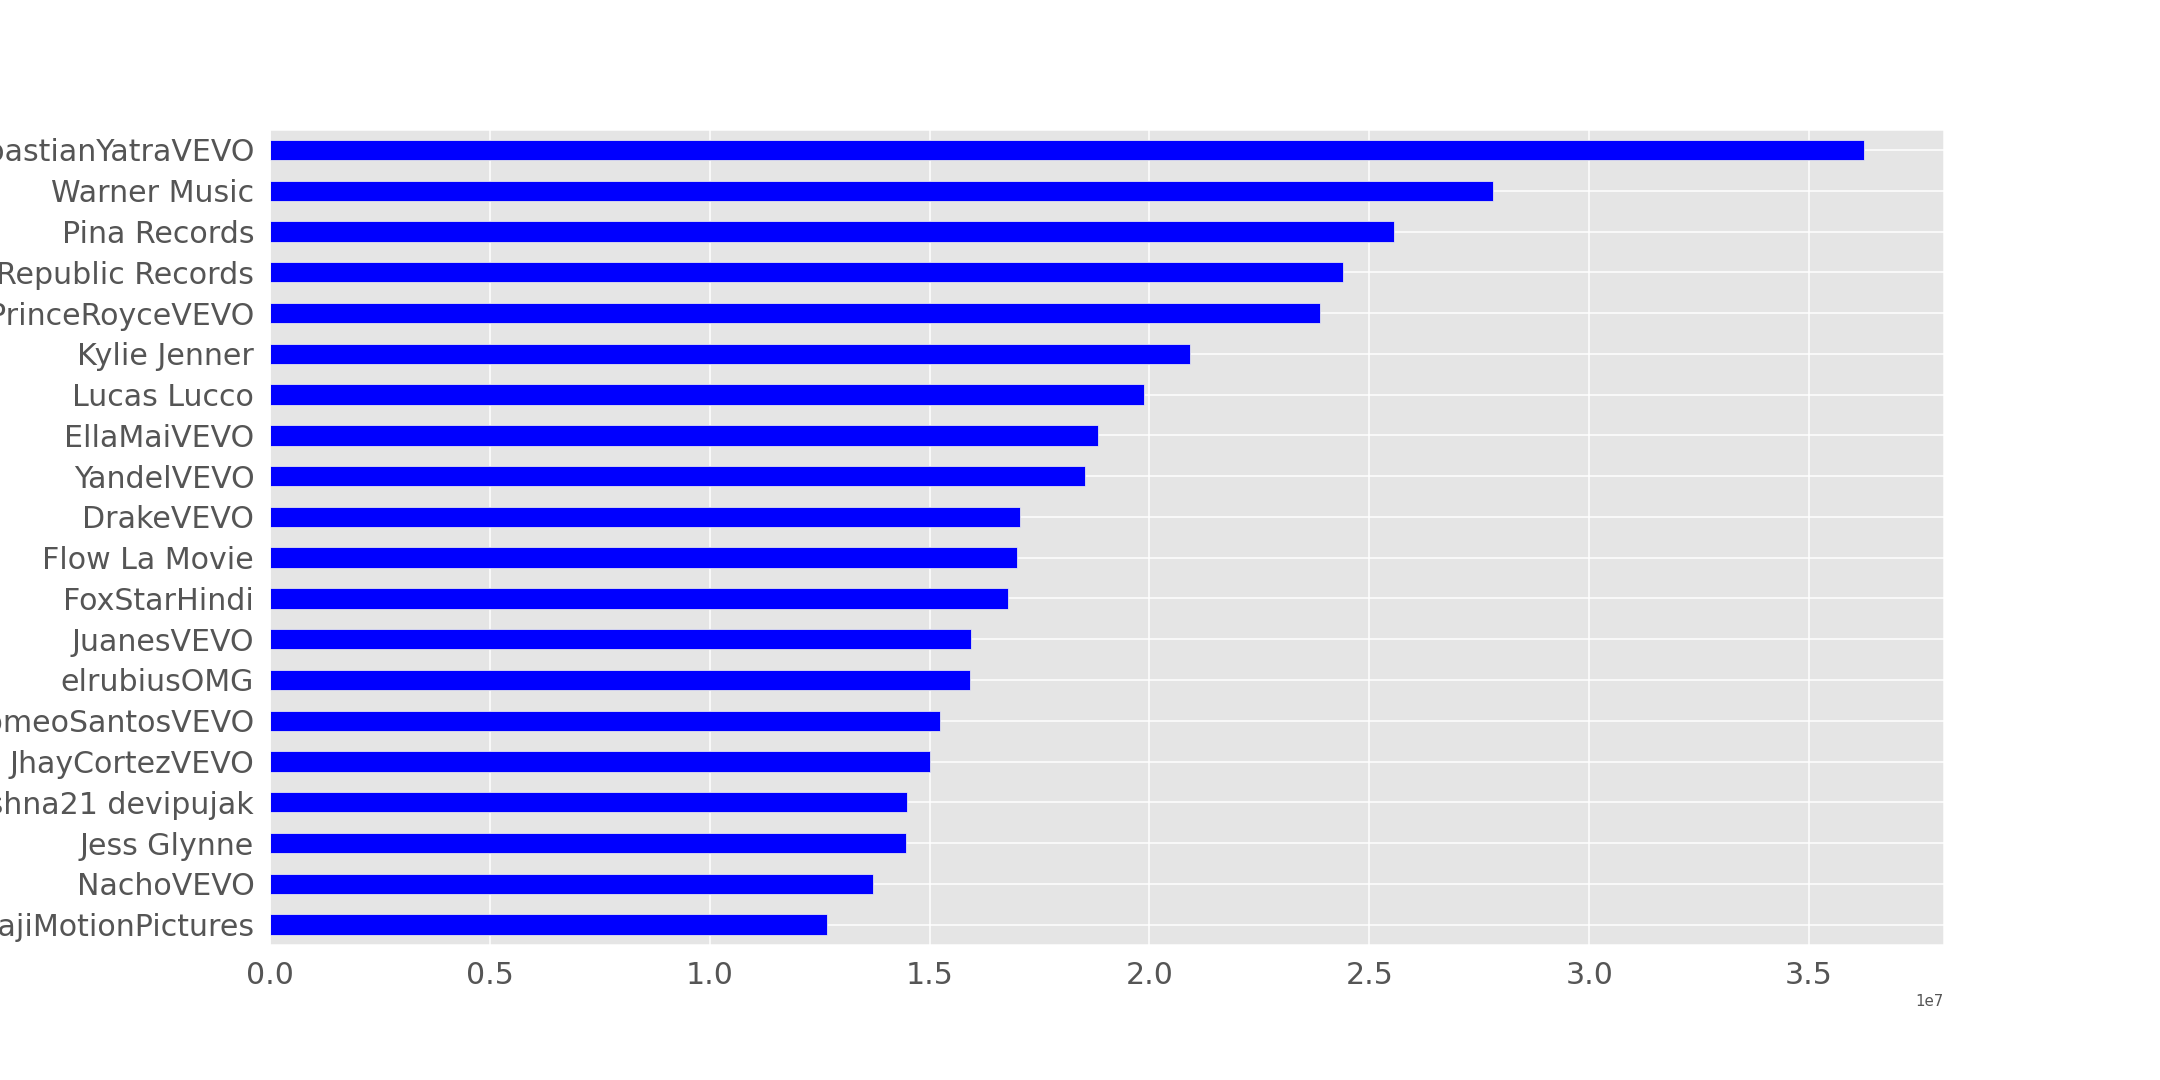

In [37]:
#top 20 channels by the mean of views

fig = plt.figure(figsize=(30, 10))
three_countries.groupby('channel_title').mean().sort_values(by=['views'], ascending=False)[:20].views.sort_values(ascending=True).plot(kind='barh',colormap='winter',fontsize=20)


**Among popular video, here are top 10 like percentage video. All of them are k-pop stars MV lol** 

 
<table><tr>
<td> <img src="https://i.ytimg.com/vi/PMEkmiQP5bg/default.jpg" alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/v9ea5VDQfXg/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/c5_LROaHGtw/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/3-FXW0CW_8o/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/-7tSTUR7FG0/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/J41qe-TM1DY/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/nQySbNGu4g0/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/Q48VduIflPk/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/floMqK_yHf8/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/VM-g_bkFdzo/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
</tr></table>



In [31]:
#among popular videos, here are top 10 like percentage video. All of them are k-pop stars MV lol 

three_countries.loc[three_countries.popular==1].sort_values(by=['like_percentage'], ascending=False)[:10]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_names,popular,like_percentage
32215,PMEkmiQP5bg,18.02.05,G.C.F in Osaka,BANGTANTV,10,2018-04-30 13:03:49+00:00,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",2942269,688754,687,61516,https://i.ytimg.com/vi/PMEkmiQP5bg/default.jpg,False,False,False,BTS Official Homepage http://bts.ibighit.com\n...,Music,1,99.900354
14021,v9ea5VDQfXg,18.25.01,JONGHYUN 종현 '우린 봄이 오기 전에 (Before Our Spring)' MV,SMTOWN,10,2018-01-24 03:00:02+00:00,"JONGHYUN|""종현""|""샤이니""|""SHINee""|""우린 봄이 오기 전에""|""Be...",1498763,310738,332,26463,https://i.ytimg.com/vi/v9ea5VDQfXg/default.jpg,False,False,False,JONGHYUN's Poet | Artist has been released.\nL...,Music,1,99.893272
3245,c5_LROaHGtw,17.30.11,[EPISODE] BTS (방탄소년단) 'MIC Drop' MV Shooting,BANGTANTV,10,2017-11-29 10:00:03+00:00,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",1447420,245075,354,12157,https://i.ytimg.com/vi/c5_LROaHGtw/default.jpg,False,False,False,BTS Official Homepage http://bts.ibighit.com\n...,Music,1,99.855763
16323,3-FXW0CW_8o,18.05.02,[BANGTAN BOMB] V&Jungkook Singing at standby time,BANGTANTV,10,2018-02-04 06:00:07+00:00,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",1596081,345195,702,40251,https://i.ytimg.com/vi/3-FXW0CW_8o/default.jpg,False,False,False,BTS Official Homepage http://bts.ibighit.com\n...,Music,1,99.797049
20788,-7tSTUR7FG0,18.28.02,NCT U 엔시티 유 'BOSS' Dance Practice,SMTOWN,10,2018-02-27 12:00:00+00:00,"NCT|""NCT 2018""|""TAEYONG""|""JAEHYUN""|""JUNGWOO""|""...",1092530,152536,338,8272,https://i.ytimg.com/vi/-7tSTUR7FG0/default.jpg,False,False,False,NCT U BOSS MV has reached 10 million views!\nT...,Music,1,99.778903
13987,J41qe-TM1DY,18.24.01,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,SMTOWN,10,2018-01-23 04:00:00+00:00,"JONGHYUN|""종현""|""SHINee""|""샤이니""|""빛이 나""|""Shinin'""|...",4285299,827162,1897,104986,https://i.ytimg.com/vi/J41qe-TM1DY/default.jpg,False,False,False,JONGHYUN's Poet | Artist has been released.\nL...,Music,1,99.771186
37457,nQySbNGu4g0,18.28.05,[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...,BANGTANTV,10,2018-05-27 11:00:03+00:00,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",4196932,845029,1948,56047,https://i.ytimg.com/vi/nQySbNGu4g0/default.jpg,False,False,False,BTS Official Homepage http://bts.ibighit.comBT...,Music,1,99.770006
9622,Q48VduIflPk,18.01.01,[STATION] SMTOWN 'Dear My Family (Live Concert...,SMTOWN,10,2017-12-29 09:00:02+00:00,"SM STATION|""SMTOWN""|""Dear My Family""|""SM Enter...",2332110,346819,803,22920,https://i.ytimg.com/vi/Q48VduIflPk/default.jpg,False,False,False,SMTOWN's STATION track Dear My Family has been...,Music,1,99.769002
14623,floMqK_yHf8,18.28.01,[BANGTAN BOMB] 'MIC Drop' Special Stage (BTS f...,BANGTANTV,10,2018-01-27 05:00:00+00:00,"방탄소년단|""BTS""|""BANGTAN""|""HIPHOP""|""랩몬스터""|""RapMons...",1835185,342655,807,25545,https://i.ytimg.com/vi/floMqK_yHf8/default.jpg,False,False,False,BTS Official Homepage http://bts.ibighit.com\n...,Music,1,99.765040
28243,VM-g_bkFdzo,18.07.04,[STATION] TEN 텐 'New Heroes' MV,SMTOWN,10,2018-04-06 09:00:05+00:00,"NCT|""텐""|""TEN""|""SM STATION""|""슴스테""|""New Heroes""|...",1113267,206212,507,19119,https://i.ytimg.com/vi/VM-g_bkFdzo/default.jpg,False,False,False,"The 52nd STATION track, TEN's New Heroes has b...",Music,1,99.754740


<center>**NO.1 like percentage video among popular videos in the dataset! Congrat to Bangtan :)) A decent song to listen while coding 👩‍💻**</center> <br>
<center><iframe width="560" height="315" src="https://www.youtube.com/embed/PMEkmiQP5bg" frameborder="0" allowfullscreen></iframe></center>



**Among popular video, here are top 10 dislike percentage video** 


<table><tr>
<td> <img src="https://i.ytimg.com/vi/V5cOvyDpWfM/default.jpg" alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/qu-biRtYEcU/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/Aqx41JrNTSw/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/C-rumHvmqCA/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/ivYp5NMaUY4/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/xZZyckBhCmY/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/zhUmo88gzwg/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/CMA2iF6RuXk/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/wJJqGh2HLM8/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
<td> <img src="https://i.ytimg.com/vi/eT9eWtb7C4c/default.jpg"  alt="Drawing" style="width: 700px;"/> </td>
</tr></table>


In [32]:
#among popular videos, here are top 10 dislike percentage video. 

three_countries.loc[three_countries.popular==1].sort_values(by=['like_percentage'], ascending=True)[:10]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_names,popular,like_percentage
18945,V5cOvyDpWfM,18.19.02,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,17,2018-02-19 01:37:11+00:00,"mlg highlights|""mlg""|""basketball""|""highlights""...",1211176,3553,18200,8338,https://i.ytimg.com/vi/V5cOvyDpWfM/default.jpg,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,Sports,1,16.333379
2406,qu-biRtYEcU,17.26.11,Volar - Jaime Ciero,paulitaale,10,2011-12-26 02:50:18+00:00,"Jaime Ciero|""compositor""|""cantautor Chileno Me...",1213682,757,3275,1495,https://i.ytimg.com/vi/qu-biRtYEcU/default.jpg,False,False,False,"Jaime Ciero, compositor, cantautor Chileno Me ...",Music,1,18.774802
19425,Aqx41JrNTSw,18.21.02,김보름 진심으로 사과드립니다..결국 눈물로 사죄 (기자회견 풀영상) / SBS / ...,SBS 뉴스,25,2018-02-20 09:33:31+00:00,"뉴스|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""SBS8N...",1337500,2200,8092,14673,https://i.ytimg.com/vi/Aqx41JrNTSw/default.jpg,False,False,False,스피드스케이팅 여자 팀추월 경기에서 불거진 팀워크 논란과 관련해 당사자인 김보름 선...,News & Politics,1,21.375826
16194,C-rumHvmqCA,18.05.02,T-Mobile | #LittleOnes | 2018 Big Game Ad,T-Mobile,24,2018-02-05 02:12:26+00:00,"best super bowl ads|""best superbowl ads""|""best...",1687984,1700,5735,0,https://i.ytimg.com/vi/C-rumHvmqCA/default.jpg,True,False,False,"Welcome to the world, little ones! In this big...",Entertainment,1,22.864829
24665,ivYp5NMaUY4,18.19.03,Выборы-2018. Подсчет голосов. Прямой эфир,Политика сегодня: Россия США Украина,25,2018-03-19 00:53:55+00:00,"соловьев|""владимир""|""политика россии""|""политик...",1524665,11331,37610,2971,https://i.ytimg.com/vi/ivYp5NMaUY4/default.jpg,False,False,False,ПОДПИСКА ЛУЧШЕ ДОНАТА - http://bit.ly/2nZJUXo\...,News & Politics,1,23.152367
9994,xZZyckBhCmY,18.03.01,REUPLOAD Logan Paul Vlogs We found a dead bo...,ShadeBlade02,23,2018-01-02 04:08:05+00:00,"Logan Paul|""Jake Paul""",2299882,9382,30072,5709,https://i.ytimg.com/vi/xZZyckBhCmY/default.jpg,False,False,False,just to show how shitty logan paul is.\nEDIT: ...,Comedy,1,23.779591
10297,zhUmo88gzwg,18.04.01,Logan Paul deleted Vlog video - Suicide forest...,Enima Videos,24,2018-01-02 23:57:52+00:00,"logan|""paul""|""logan paul""|""jake paul""|""pewdiep...",1231083,2699,8482,1006,https://i.ytimg.com/vi/zhUmo88gzwg/default.jpg,False,False,False,"Logan paul , big brother of Jake Paul ( owner ...",Entertainment,1,24.139165
19173,CMA2iF6RuXk,18.20.02,Fergie's national anthem draws criticism | ESPN,ESPN,17,2018-02-19 12:42:36+00:00,"espn|""espn live""|""fergie""|""national""|""anthem""|...",2762839,14362,37877,21507,https://i.ytimg.com/vi/CMA2iF6RuXk/default.jpg,False,False,False,The Black Eyed Peas singer Fergie provides a u...,Sports,1,27.492869
16481,wJJqGh2HLM8,18.06.02,Hope Detector | Hyundai NFL Super Bowl LII,HyundaiUSA,2,2018-02-04 23:31:40+00:00,"Hyundai|""Hyundai Super Bowl""|""Hyundai surprise...",1946367,670,1679,241,https://i.ytimg.com/vi/wJJqGh2HLM8/default.jpg,False,False,False,What if metal detectors detected something mor...,Autos & Vehicles,1,28.522776
12267,eT9eWtb7C4c,18.16.01,Show Dogs | Official Trailer | In Theaters May 18,Open Road Films,24,2018-01-11 23:10:38+00:00,"show dogs|""movie""|""dogs""|""talking dogs""|""will ...",1482178,54,86,37,https://i.ytimg.com/vi/eT9eWtb7C4c/default.jpg,False,False,False,"Starring Will Arnett, Chris Ludacris Bridges, ...",Entertainment,1,38.571429


<center>**No.1 dislike percentage video among popular videos in the dataset..No offense Fergie fans out there 🙃**</center> <br>
<center><iframe width="560" height="315" src="https://www.youtube.com/embed/V5cOvyDpWfM" frameborder="0" allowfullscreen></iframe></center>



